#### Charging a Capacitor
Electric current is the rate of change of charge.
$$i=\frac{dq}{dt}$$
Capacitance relates the voltage across a capacitor to the amount of charge stored in the capacitor.
$$q = Cv_C \implies v_C = \frac{q}{C}$$
The current through a capacitor is proportional to the rate of change in voltage across the capacitor. This implies the change in voltage is proportional to the current through the capacitor.
$$i = C \frac{dv_C}{dt} \implies dv_C = dt\frac{i}{C}$$
By starting with a discharged capacitor $v_0 = 0 $ and $i_0 = \frac{V}{R}$ we can compute the voltage and current characteristics of a charging capacitor using Euler's method.
$$
v_{Cn+1} = v_{Cn}+dv_C \implies v_{Cn+1} = v_{Cn}+dt\frac{i}{C}\\
i_{n+1} = \frac{V-v_{Cn+1}}{R}
$$

In [1]:
def charge_capacitor(n,dt, V=5, R=1000,C = 0.001):

    voltages=[0]
    currents=[V/R]
    for t in range(1,n):
        v = voltages[t-1]+(dt*currents[t-1]/C)
        voltages.append(v)
        currents.append((V-v)/R)   
    return voltages,currents

#### Discharging a Capacitor

By starting with a charged capacitor $v_0 = V $ and $i_0 = -\frac{V}{R}$ (negative current because we are discharging), we can compute the voltage and current characteristics of a discharging capacitor using Euler's method.
$$
v_{Cn+1} = v_{Cn}+dv_C \implies v_{Cn+1} = v_{Cn}+dt\frac{i}{C}\\
i_{n+1} = \frac{-v_{Cn+1}}{R}
$$

In [2]:
def discharge_capacitor(n,dt, V=5, R=1000,C = 0.001):

    voltages=[5]
    currents=[-V/R]
    for t in range(1,n):
        v = voltages[t-1]+(dt*currents[t-1]/C)
        voltages.append(v)
        currents.append(-(v)/R)   
    return voltages,currents

In [3]:
import numpy as np
import matplotlib.pyplot as plt



def plot():
    # Generate data points for time
    start_time = 0
    finish_time = 5
    samples = 100
    V = 5
    R = 1500
    C = 0.001
    dt = finish_time/(samples-1)
    x = np.linspace(start_time, finish_time, samples,dtype=float)
    
    scale=1000

    charge_voltage,charge_current =charge_capacitor(len(x),dt,V,R,C)
    charge_current= list(map(lambda x:x*scale,charge_current))

    discharge_voltage,discharge_current =discharge_capacitor(len(x),dt,V,R,C)
    #print(discharge_current)

    discharge_current= list(map(lambda x:x*scale,discharge_current))
    
    # Create a figure and axis
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 10))

    # Plot the charge function
    ax1.plot(x, charge_voltage, label=f'charge voltage V')
    ax1.plot(x, charge_current, label=f'charge current A/{scale}')
    ax1.set_xlabel('Time s')
    ax1.set_ylabel('Voltage/current')
    # Customize the plot
    ax1.set_title(f'Charge {V}V {R}\u03A9 {C}Farads')
    ax1.legend()
    ax1.grid(True)
    # Plot the charge function
    ax2.plot(x, discharge_voltage, label=f'discharge voltage V')
    ax2.plot(x, discharge_current, label=f'discharge current A/{scale}')
    ax2.set_xlabel('Time s')
    ax2.set_ylabel('Voltage/current')
    # Customize the plot
    ax2.set_title(f'Discharge {V}V {R}\u03A9 {C}Farads')
    ax2.legend()
    ax2.grid(True)
    plt.show()

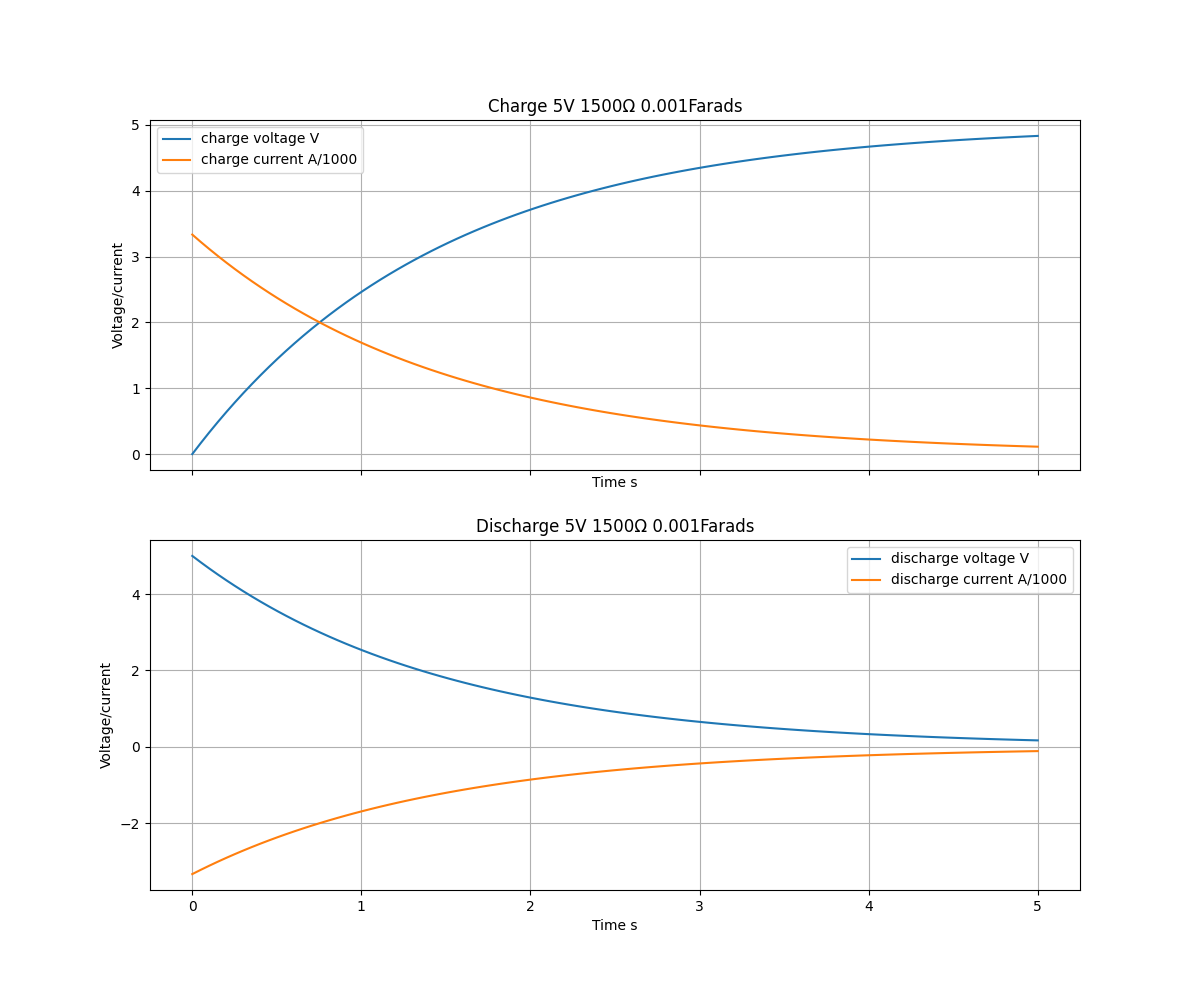

In [4]:
plot()

V=iR+Ldi/dt

In [5]:
def energise_inductor(n,dt, V=5, R=1000,L = 0.001):
    voltages=[V]
    currents=[0]
    #print(currents)
    for t in range(1,n):
        vL=V-(currents[t-1]*R) #voltage across inductor vL
        di = dt*vL/L
        currents.append(currents[t-1]+di)
        voltages.append(vL)
        #print(currents)
    return voltages,currents

In [6]:
def de_energise_inductor(n,dt, V=5, R=1000,L = 0.001):
    voltages=[V]
    currents=[V/R]
    for t in range(1,n):
        di = dt*R*currents[t-1]/L
        currents.append(currents[t-1]-di)
        voltages.append(currents[t]*R)
        #print(currents)
    return voltages,currents

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot2():
    # Generate data points for time
    start_time = 0
    finish_time = 0.001
    samples = 1000000
    V = 5
    R = 1500
    L = 0.2
    dt = finish_time/(samples-1)
    x = np.linspace(start_time, finish_time, samples,dtype=float)
    
    scale=1000

    charge_voltage,charge_current =energise_inductor(len(x),dt,V,R,L)
    #print(charge_current)
    charge_current= list(map(lambda x:x*scale,charge_current))

    discharge_voltage,discharge_current =de_energise_inductor(len(x),dt,V,R,L)
    #print(discharge_current)

    discharge_current= list(map(lambda x:x*scale,discharge_current))
    
    # Create a figure and axis
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 10))

    # Plot the charge function
    ax1.plot(x, charge_voltage, label=f'energise voltage V')
    ax1.plot(x, charge_current, label=f'energise current A/{scale}')
    ax1.set_xlabel('Time s')
    ax1.set_ylabel('Voltage/current')
    # Customize the plot
    ax1.set_title(f'Energise {V}V {R}\u03A9 {L}Henry')
    ax1.legend()
    ax1.grid(True)
    # Plot the charge function
    ax2.plot(x, discharge_voltage, label=f'de-energise voltage V')
    ax2.plot(x, discharge_current, label=f'de-energise current A/{scale}')
    ax2.set_xlabel('Time s')
    ax2.set_ylabel('Voltage/current')
    # Customize the plot
    ax2.set_title(f'De-energise {V}V {R}\u03A9 {L}Henry')
    ax2.legend()
    ax2.grid(True)
    plt.show()

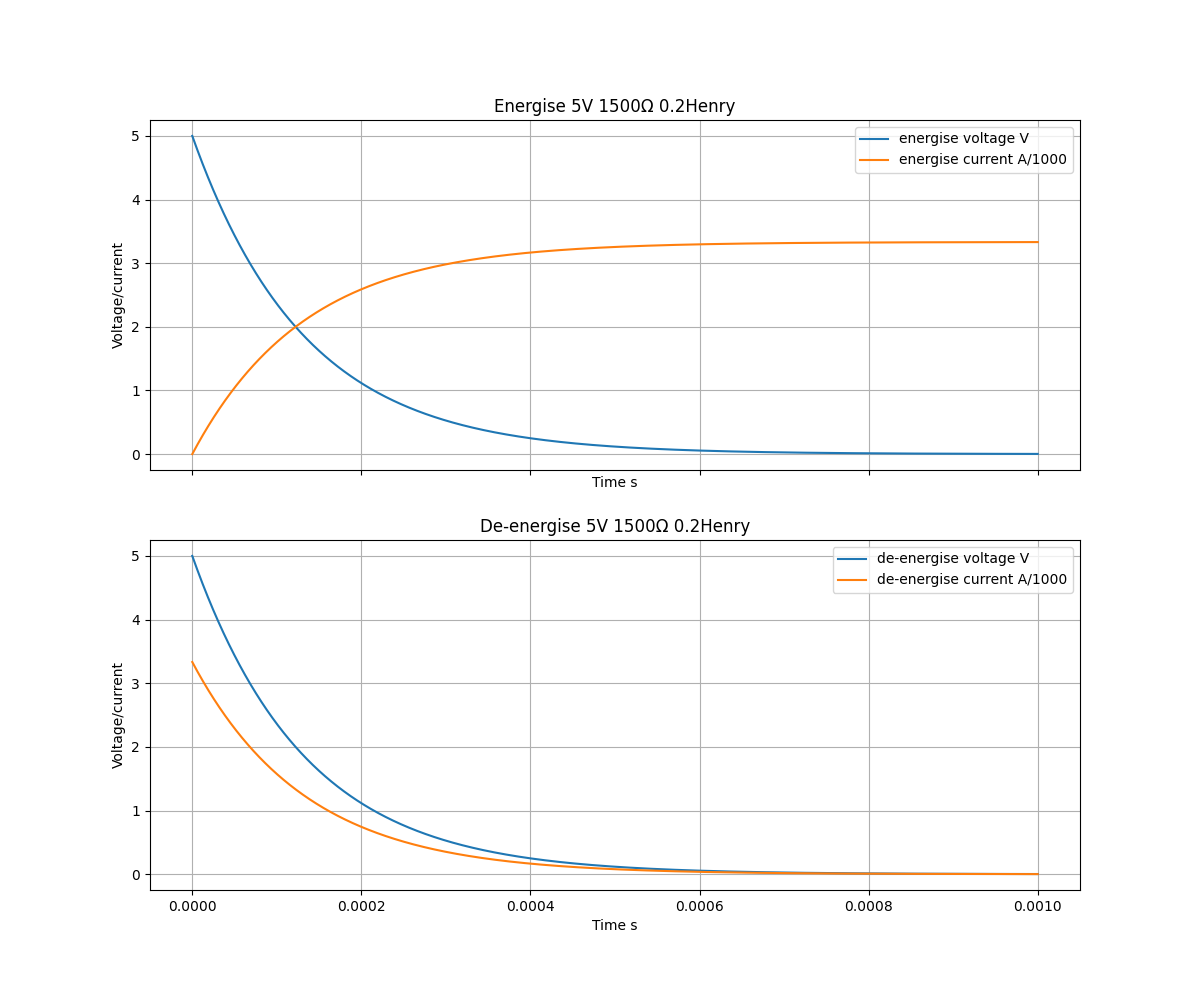

In [8]:
plot2()

In [9]:
def tuned_l_c_cct(n, dt, q= 1.0, i = 0.0, L = 0.001,C=0.001):
    charges=[q]
    currents=[i]
    for t in range(1,n):
        currents.append(currents[t-1]-dt*charges[t-1]/(L*C))
        charges.append(charges[t-1]+dt*currents[t-1])
    return charges, currents

In [10]:
import numpy as np
import matplotlib.pyplot as plt



def plot3():
    # Generate data points for time
    start_time = 0
    finish_time = 0.1
    samples = 10000
    q = 0.005
    i = 0.0
    L = 0.02
    C = 0.01
    dt = finish_time/(samples-1)
    x = np.linspace(start_time, finish_time, samples,dtype=float)
    
    scale=1000

    charge,current = tuned_l_c_cct(len(x), dt, q, i, L, C)

    #print(tuned_charge)
    #current= list(map(lambda x:x*scale, current))
    #charge= list(map(lambda x:x*scale, charge))
    volts= list(map(lambda x:x/C, charge))
    # Create a figure and axis 
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 10))
    ax1.set_title(f'Initial charge {q}C, Initial current {i}A, Tuned LC circuit {C}Farad {L}Henry')
    ax1.plot(x, charge, label=f'Charge C')
    ax1.set_ylabel('Charge Coulombs')
    ax1.legend()
    ax1.grid(True)
    # Plot the charge function
    ax2.plot(x, current, label=f'Current A')
    ax2.plot(x, volts, label=f'Volts V')
    ax2.set_xlabel('Time s')
    ax2.set_ylabel('Voltage and Current')
    # Customize the plot
    ax2.legend()
    ax2.grid(True)
    plt.show()

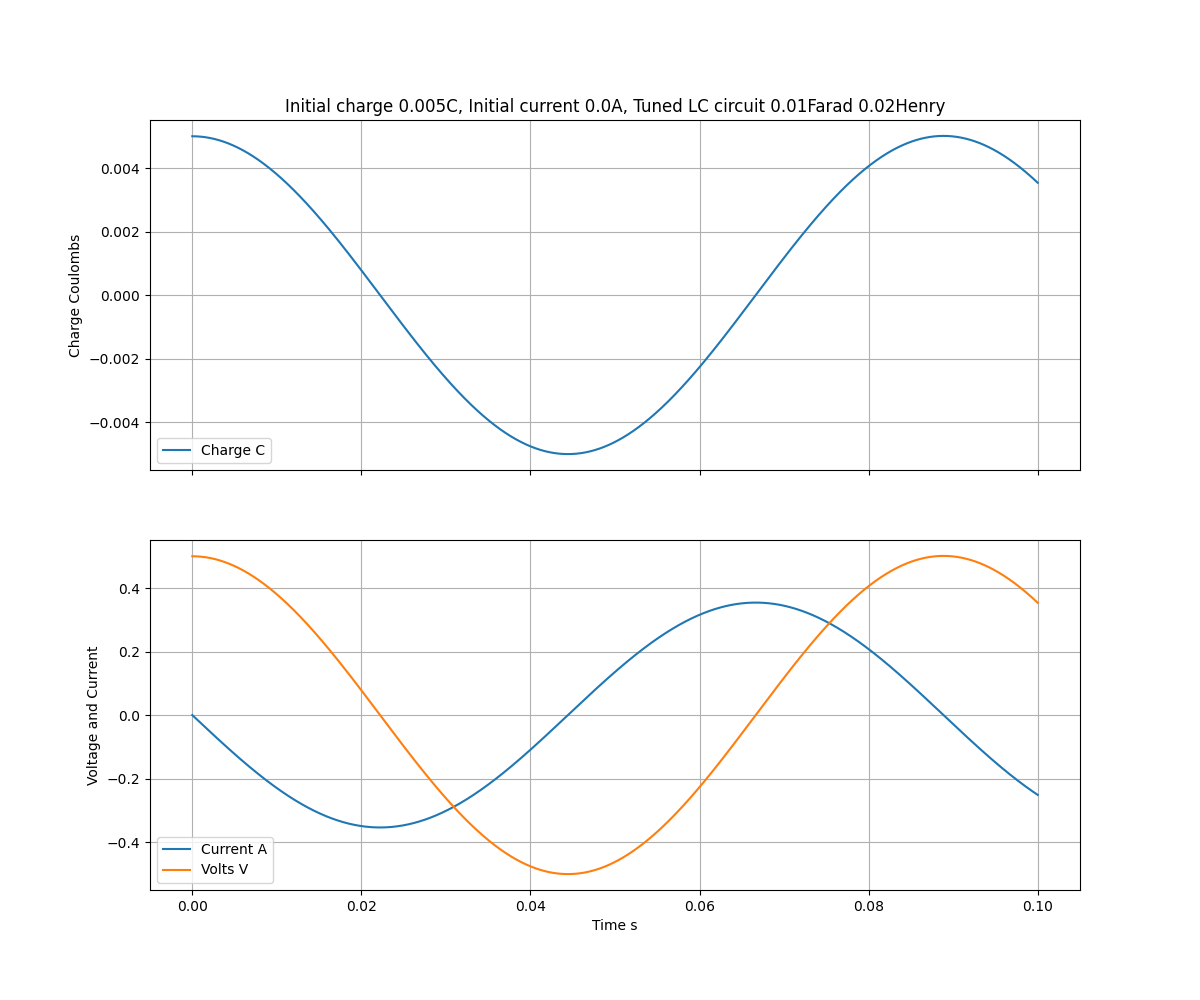

In [11]:
plot3()

In [12]:
def tuned_l_c_r_cct(n, dt, q= 1.0, i = 0.0, L = 0.001,C=0.001,R= 1.0):
    charges=[q]
    currents=[i]
    for t in range(1,n):
        di_dt = (-R * currents[t-1] / L) - (charges[t-1] / (L * C))
        currents.append(currents[t-1]+ dt * di_dt)
        charges.append(charges[t-1]+dt*currents[t-1])
    return charges, currents

In [13]:
import numpy as np
import matplotlib.pyplot as plt



def plot4():
    # Generate data points for time
    start_time = 0
    finish_time = 0.5
    samples = 10000
    q = 0.005
    i = 0.0
    L = 0.02
    C = 0.01
    R = 0.5
    dt = finish_time/(samples-1)
    x = np.linspace(start_time, finish_time, samples,dtype=float)
    
    scale=1000

    charge,current = tuned_l_c_r_cct(len(x), dt, q, i, L, C, R)

    #print(tuned_charge)
    #current= list(map(lambda x:x*scale, current))
    #charge= list(map(lambda x:x*scale, charge))
    volts= list(map(lambda x:x/C, charge))
    # Create a figure and axis 
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 10))
    ax1.set_title(f'Initial charge {q}C, Initial current {i}A, Tuned LCR circuit {C}Farad {L}Henry {R}\u03A9')
    ax1.plot(x, charge, label=f'Charge C')
    ax1.set_ylabel('Charge Coulombs')
    ax1.legend()
    ax1.grid(True)
    # Plot the charge function
    ax2.plot(x, current, label=f'Current A')
    ax2.plot(x, volts, label=f'Volts V')
    ax2.set_xlabel('Time s')
    ax2.set_ylabel('Voltage and Current')
    # Customize the plot
    ax2.legend()
    ax2.grid(True)
    plt.show()

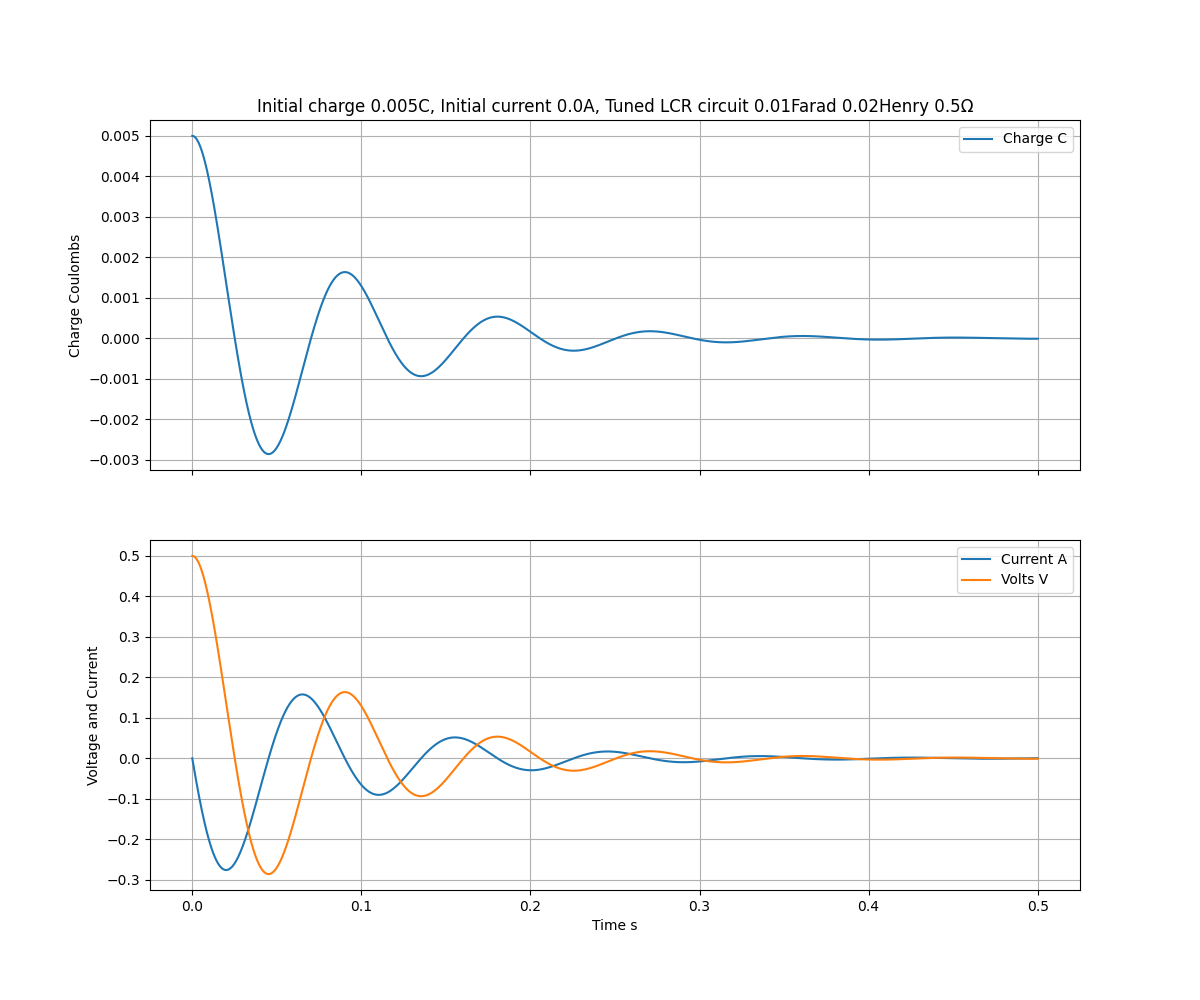

In [14]:
plot4()